### Analyse data Titanic Disaster

### Try Model: Decision Tree Regression

In [1]:
# setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

# import package Starts
from Starts.startmodskl import *

local_kwargs {'data_path': './data/train.csv, ./data/titanic_no_nan.csv ,./data/test.csv', 'drop_obj_col': False, 'nan_drop_col': False, 'nan_drop_row': False, 'nan_zero': False, 'nan_mean': True, 'nan_mean_neighbors': False}


In [2]:
# Process Nan_Column by dropping them
nonan_data = data[1]
StartML.nan_columns(nonan_data)

[]

In [3]:
# There are only numeric columns
StartML.idx_columns(nonan_data)

[('Survived', 0, dtype('int64')),
 ('Pclass', 1, dtype('int64')),
 ('Sex', 2, dtype('int64')),
 ('Age', 3, dtype('float64')),
 ('Ticket', 4, dtype('int64')),
 ('Fare', 5, dtype('float64')),
 ('Title', 6, dtype('int64')),
 ('FamilySize', 7, dtype('int64'))]

In [4]:
nonan_data.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Title,FamilySize
0,0,3,1,29.699118,182,7.225,5,0
1,0,3,1,25.000000,328,7.775,5,1
2,0,3,1,24.000000,642,7.050,5,0
3,0,3,1,28.000000,542,22.525,5,0
4,0,3,1,29.699118,462,15.500,5,1


In [5]:
StartMod.feature_scaling(nonan_data).head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Title,FamilySize
0,0.0,1.0,1.0,0.367921,0.267647,0.014102,0.625,0.0
1,0.0,1.0,1.0,0.308872,0.482353,0.015176,0.625,0.1
2,0.0,1.0,1.0,0.296306,0.944118,0.013761,0.625,0.0
3,0.0,1.0,1.0,0.346569,0.797059,0.043966,0.625,0.0
4,0.0,1.0,1.0,0.367921,0.679412,0.030254,0.625,0.1


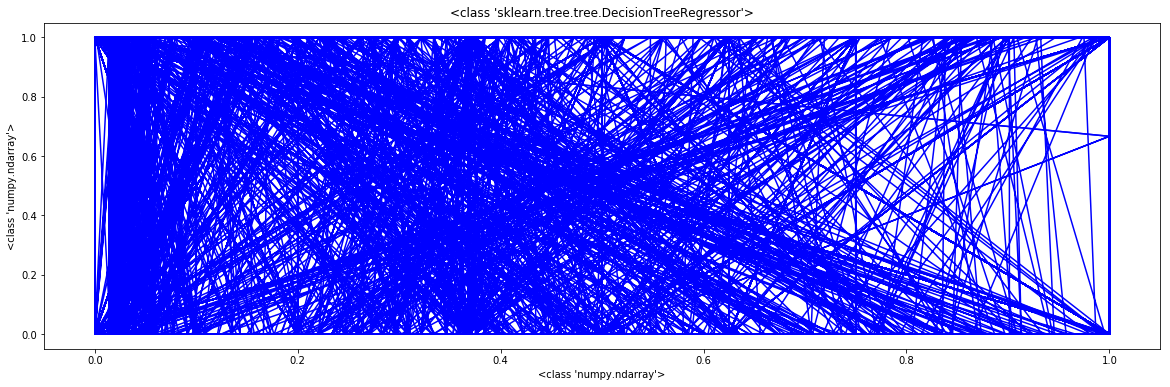

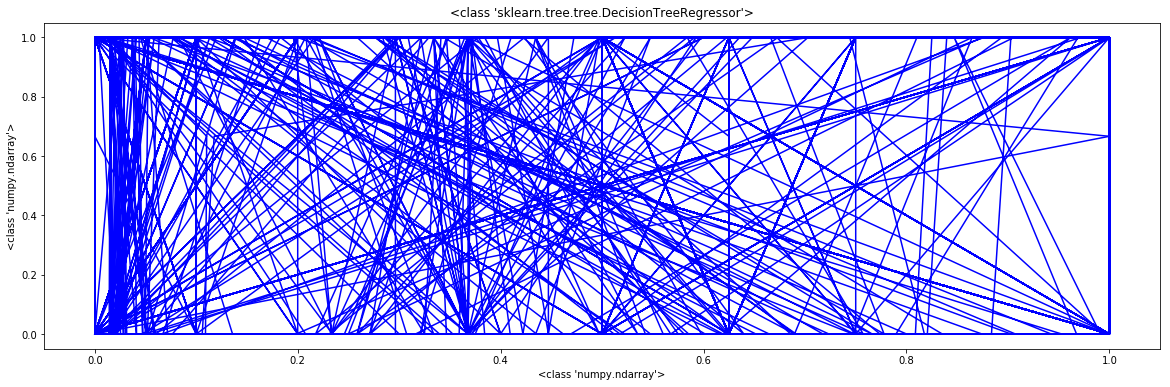

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [6]:
# Choose method Linear Regression to predict the Survivors
reg_dt, y_true, y_predict = StartModSKL.regression_decision_tree(nonan_data, 'Survived')

reg_dt

In [7]:
y_predict

array([ 0.        ,  1.        ,  1.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.66666667,
        1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.  

In [8]:
# Convert predicted value by rounding it (>0.5 will be considered as 1 else 0)
y_pred = np.array([np.round(item) for item in y_predict ])

# Compare the predicted value with true_value
len(y_true), len(y_pred)

(179, 179)

In [9]:
StartMod.metrics_report(y_true, y_pred)

Classification Report: 
              precision    recall  f1-score   support

        0.0       0.83      0.79      0.81       115
        1.0       0.65      0.70      0.68        64

avg / total       0.76      0.76      0.76       179

Confusion Matrix: 
 [[91 24]
 [19 45]]

Accuracy: 
 0.759776536313

Mean_Squared_Error: 
 0.240223463687


### Result: 
#### the correct predicted result 136, 
#### the wrong predicted result 43